In [1]:
from LSA_Dataset import LSA_Dataset

In [2]:
dataset = LSA_Dataset('/mnt/data/datasets/cn_sordos_db/data/cuts', load_videos=True, max_frames=20)

['que', 'había', 'aprendido', 'en', 'la', 'asociación', 'de', 'sordos', 'de', 'la', 'plata', ',']
torch.Size([20, 3, 240, 240]) Frames:  20


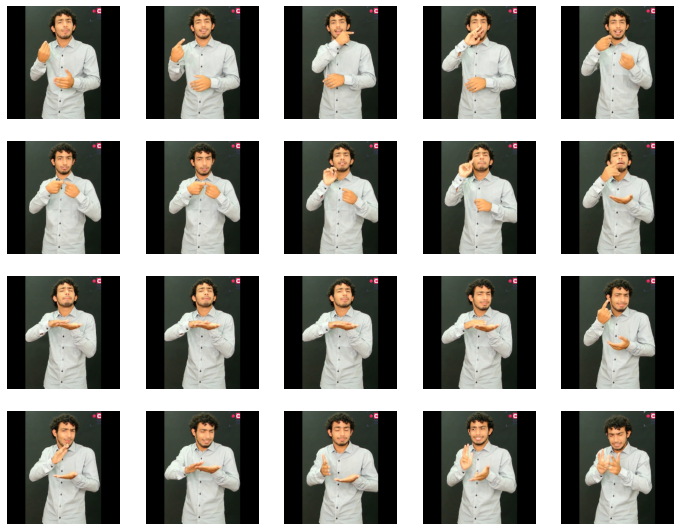

In [3]:
import random
from torch.utils.data import DataLoader
from typing import Dict, Any, TypedDict
import matplotlib.pylab as plt
from LSA_Dataset import LSA_Dataset


class Box(TypedDict):
    x1: float
    y1: float
    width: float
    height: float

i = random.randint(0, dataset.__len__())
sample = dataset.__getitem__(i)
print(sample[3].tokens)
clip = sample[1]
print(clip.size(), "Frames: ", clip.size()[0])
plt.figure(figsize=(12, 12))
for i in range(20):
    plt.subplot(5, 5, i + 1)
    iclip = clip[i, ...].permute(1,2,0)
    plt.imshow(iclip)
    plt.axis("off")

In [4]:
import random
from torch.utils.data import DataLoader
from typing import Dict, Any, TypedDict
import matplotlib.pylab as plt
from LSA_Dataset import LSA_Dataset


class Box(TypedDict):
    x1: float
    y1: float
    width: float
    height: float

i = random.randint(0, dataset.__len__())
sample = dataset.__getitem__(i)
print(sample[3].tokens)
keys = sample[2]
print(len(keys))
print(keys[0]['keypoints'])


['sin', 'embargo', ',', 'recibió', 'tratamiento', 'o', 'antirretroviral', '.']
20
[1351.4207763671875, 259.8215026855469, 0.07074102759361267, 1393.418212890625, 205.6819610595703, 0.3806682229042053, 1302.0833740234375, 204.01841735839844, 0.4264340102672577, 1450.5064697265625, 238.38201904296875, 0.10140730440616608, 1231.7342529296875, 240.70314025878906, 0.061147548258304596, 1575.4033203125, 482.51141357421875, 0.9193315505981445, 1160.279296875, 460.1280822753906, 0.5652471780776978, 1669.822265625, 849.9280395507812, 0.592747688293457, 1089.82568359375, 827.2648315429688, 0.19912144541740417, 1417.2244873046875, 809.5784912109375, 0.6580600738525391, 1142.3248291015625, 709.2681884765625, 0.30018776655197144, 1476.86865234375, 1034.9210205078125, 0.29172104597091675, 1201.962158203125, 1006.7193603515625, 0.08462150394916534, 1453.98828125, 1095.513427734375, 0.0001721114240353927, 1220.6688232421875, 1080.2132568359375, 7.830250069673639e-06, 1461.5137939453125, 1093.156127929

In [ ]:
loader = DataLoader(dataset, batch_size=12)
data: Dict[str, Any] = {'path': [], 'clip': [], 'keypoints': [], 'label': []}
for batch in loader:
    for i in range(len(batch['path'])):
        data['path'].append(batch['path'][i])
        data['clip'].append(batch['clip'][i].size())
        #data['keypoints'].append(batch['end'][i])
        data['label'].append(batch['label'][i])
print(data)